In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
import pickle
from generate_pacients import Pacient

In [2]:
plt.interactive(True)
%matplotlib inline
plt.rcParams['figure.figsize'] = [15, 6]

In [3]:
patients = []
try:
    with open('patients.obj', 'rb') as patients_file:
        patients = pickle.load(patients_file)

except Exception as e:
    print('ERROR: ' + str(e))

In [4]:
n = 3  # Patient number

In [5]:
# Print patient's features
print('pse: ' + patients[n].features[1])
print('psp1: ' + patients[n].features[2])
print('psp2: ' + patients[n].features[3])
print('psp3: ' + patients[n].features[4])
print('pspf1: ' + patients[n].features[5])
print('pspf2: ' + patients[n].features[6])
print('pspf3: ' + patients[n].features[7])
print('wpsp: ' + patients[n].features[8])
print('cpt: ' + patients[n].features[9])

pse: 6.313455505844891
psp1: 5.093545015923192
psp2: 0.4335673813176543
psp3: 0.36647457527435506
pspf1: 11
pspf2: 7
pspf3: 1
wpsp: 50.93545015923192
cpt: 0.03706279567774473


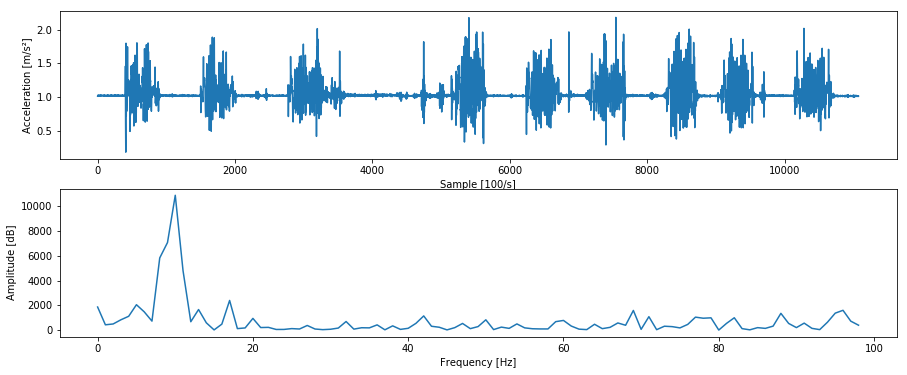

In [6]:
plt.subplot(211)
plt.plot(patients[n].data)
plt.ylabel('Acceleration [m/s²]')
plt.xlabel('Sample [100/s]')

plt.subplot(212)
plt.plot(patients[n].fft)
plt.ylabel('Amplitude [dB]')
plt.xlabel('Frequency [Hz]')

plt.show()

In [7]:
n_windows = len(patients[n].data_windows)

lines = 0
if   (n_windows % 3) == 0: lines = 3
elif (n_windows % 4) == 0: lines = 4
elif (n_windows % 5) == 0: lines = 5
    
columns = int(n_windows/lines)

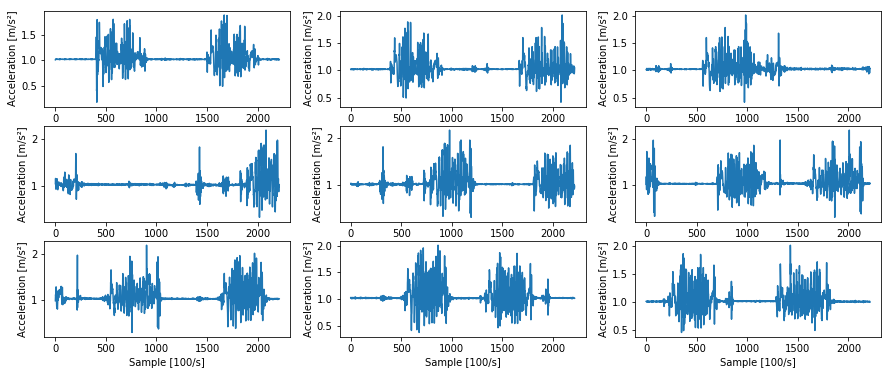

In [8]:
for i in range(n_windows):
    plt.subplot(lines, columns, i+1)
    plt.plot(patients[n].data_windows[i])
    plt.ylabel('Acceleration [m/s²]')
    plt.xlabel('Sample [100/s]')

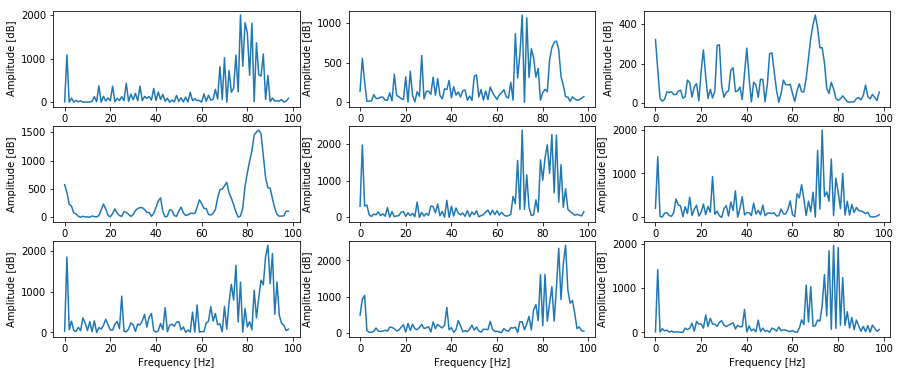

In [9]:
for i in range(n_windows):
    plt.subplot(lines, columns, i+1)
    plt.plot(patients[n].fft_windows[i])
    plt.ylabel('Amplitude [dB]')
    plt.xlabel('Frequency [Hz]')

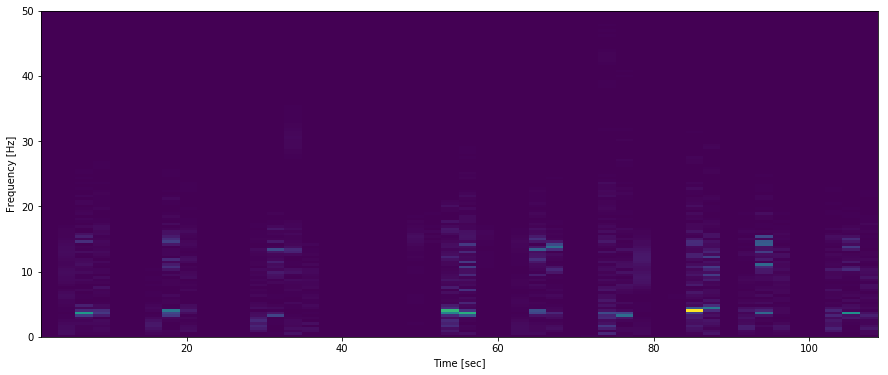

In [10]:
f, t, Sxx = signal.spectrogram(patients[n].data, fs=100)
plt.pcolormesh(t, f, Sxx)
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()

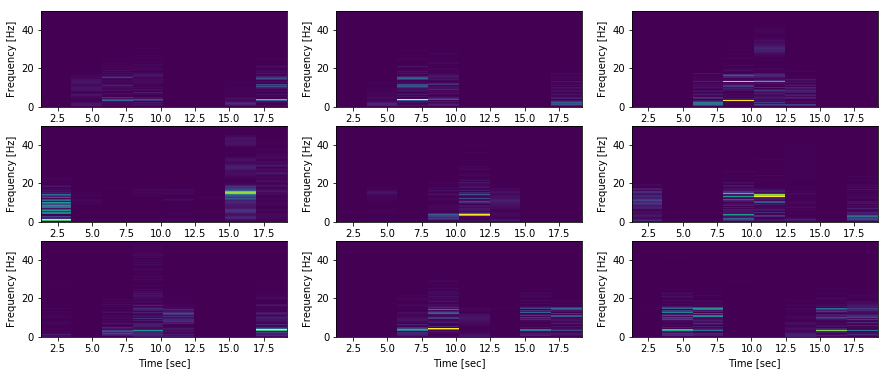

In [11]:
for i in range(n_windows):
    plt.subplot(lines, columns, i+1)
    f, t, Sxx = signal.spectrogram(patients[n].data_windows[i], fs=100)
    plt.pcolormesh(t, f, Sxx)
    plt.ylabel('Frequency [Hz]')
    plt.xlabel('Time [sec]')

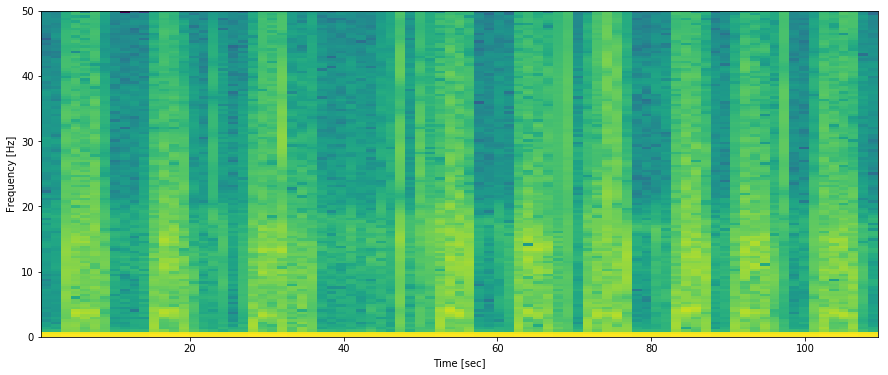

In [12]:
plt.specgram(patients[n].data, Fs=100)
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()

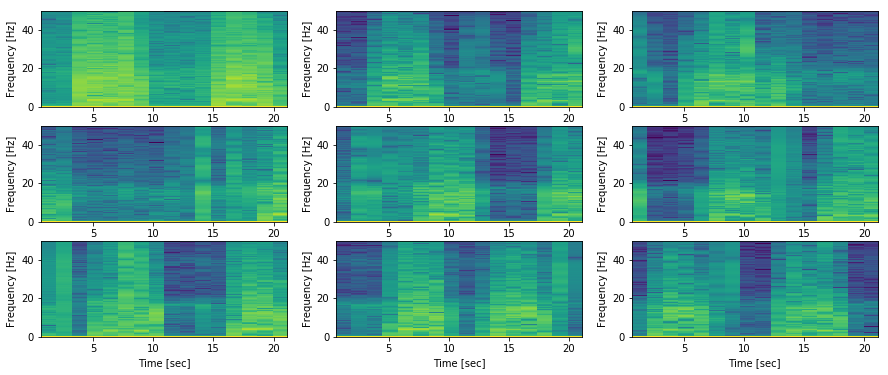

In [13]:
for i in range(n_windows):
    plt.subplot(lines, columns, i+1)
    plt.specgram(patients[n].data_windows[i], Fs=100)
    plt.ylabel('Frequency [Hz]')
    plt.xlabel('Time [sec]')

### From here onwards, all plots used are with segmented TUGs. May not be correct

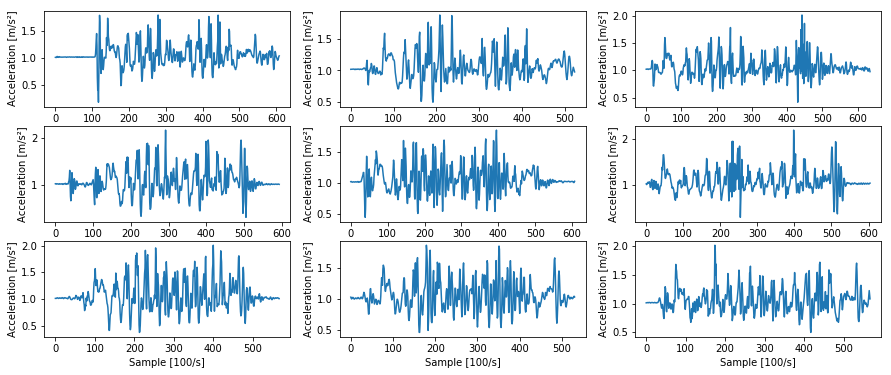

In [14]:
for i in range(9):
    tug_begin = patients[n].tugs[i][0]
    tug_end = patients[n].tugs[i][1]
    plt.subplot(3, 3, i+1)
    plt.plot(patients[n].data[tug_begin:tug_end])
    plt.ylabel('Acceleration [m/s²]')
    plt.xlabel('Sample [100/s]')

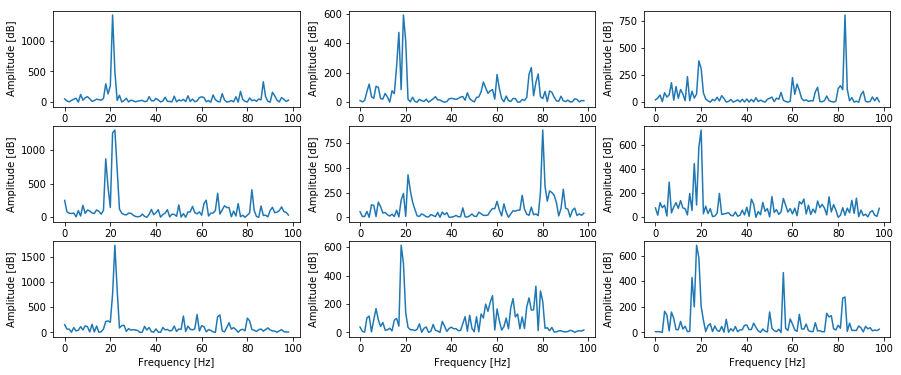

In [15]:
for i in range(9):
    tug_begin = patients[n].tugs[i][0]
    tug_end = patients[n].tugs[i][1]
    tug_fft = pow(abs(np.fft.rfft(patients[n].data[tug_begin:tug_end])), 2)[1:100]
    plt.subplot(3, 3, i+1)
    plt.plot(tug_fft)
    plt.ylabel('Amplitude [dB]')
    plt.xlabel('Frequency [Hz]')

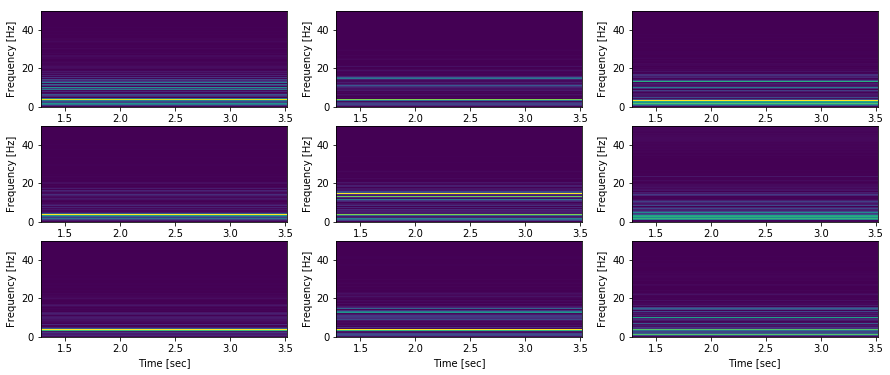

In [16]:
for i in range(9):
    tug_begin = patients[n].tugs[i][0]
    tug_end = patients[n].tugs[i][1]
    f, t, Sxx = signal.spectrogram(patients[n].data[tug_begin:tug_end], fs=100)
    plt.subplot(3, 3, i+1)
    plt.pcolormesh(t, f, Sxx)
    plt.ylabel('Frequency [Hz]')
    plt.xlabel('Time [sec]')

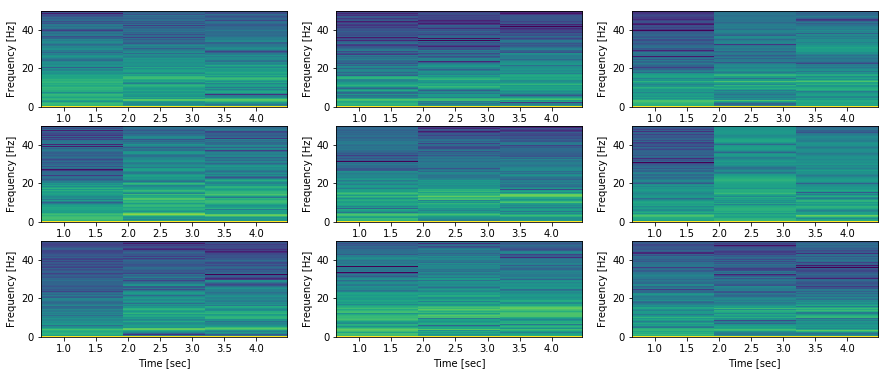

In [17]:
for i in range(9):
    tug_begin = patients[n].tugs[i][0]
    tug_end = patients[n].tugs[i][1]
    plt.subplot(3, 3, i+1)
    plt.specgram(patients[n].data[tug_begin:tug_end], Fs=100)
    plt.ylabel('Frequency [Hz]')
    plt.xlabel('Time [sec]')